<a href="https://colab.research.google.com/github/rajaram1988/Rajaram-Data-Scientist/blob/rajaram1988-Capstone/Capstone_AIML_Version1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library 

Setting the work directory and importing necessary libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import os
import glob

os.chdir('/content/drive/My Drive/Capstone/')
path='.'

In [3]:
import numpy as np
!pip install scikit-multilearn
!pip install arff
!pip install googletrans
!pip install pyLDAvis
!pip install langid
import langid
import pyLDAvis.gensim
!pip install wordninja 
import nltk
from nltk.corpus import words
nltk.download('punkt')
nltk.download('words')
from spacy.lang.en.stop_words import STOP_WORDS
from nltk.tokenize import word_tokenize
import utils
!pip install pyspellchecker
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


/usr/local/lib/python3.6/dist-packages/_pytest/mark/structures.py:426: DeprecationWarning: The usage of `cmp` is deprecated and will be removed on or after 2021-06-01.  Please use `eq` and `order` instead.
  @attr.s(cmp=False, hash=False)


In [4]:
path = '/content/drive/My Drive/Capstone/'

In [5]:
import pandas as pd

tic_df = pd.read_excel('input_data.xlsx')

In [6]:
tic_df.shape

(8500, 4)

In [7]:
tic_df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [8]:
tic_df.rename(columns={"Short description": "Short_description", "Assignment group": "Assignment_group"},inplace=True)

In [9]:
tic_df.isna().sum()

Short_description    8
Description          1
Caller               0
Assignment_group     0
dtype: int64

In [10]:
tic_df[tic_df['Short_description'].isna()] 

,Short_description,Description,Caller,Assignment_group
2604,NaN,\n\nreceived from: ohdrnswl.rezuibdt@gmail.com...,ohdrnswl rezuibdt,GRP_34
3383,NaN,\n-connected to the user system using teamview...,qftpazns fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn.\n-connected to t...,awpcmsey ctdiuqwe,GRP_0
3910,NaN,-user unable tologin to vpn.\n-connected to t...,rhwsmefo tvphyura,GRP_0
3915,NaN,-user unable tologin to vpn.\n-connected to t...,hxripljo efzounig,GRP_0
3921,NaN,-user unable tologin to vpn.\n-connected to t...,cziadygo veiosxby,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,wvqgbdhm fwchqjor,GRP_0
4341,NaN,\n\nreceived from: eqmuniov.ehxkcbgj@gmail.com...,eqmuniov ehxkcbgj,GRP_0


In [11]:
null_description = tic_df.loc[tic_df['Short_description'].isna(),'Description']

tic_df.loc[tic_df['Short_description'].isna(),'Short_description'] = null_description

In [12]:
null_sdescription = tic_df.loc[tic_df['Description'].isna(),'Short_description']

tic_df.loc[tic_df['Description'].isna(),'Description'] = null_sdescription

In [13]:
tic_df.isna().sum()

Short_description    0
Description          0
Caller               0
Assignment_group     0
dtype: int64

In [14]:
# summerize the labelled language
tic_df['Description'][0:5].apply(langid.classify)

0     (en, -431.8451840877533)
1    (en, -280.24146819114685)
2    (en, -105.38433408737183)
3     (en, -21.68566083908081)
4      (da, -10.9104642868042)
Name: Description, dtype: object

In [15]:
# get the language id for each text
ids_langid = tic_df['Description'].apply(langid.classify)
# get just the language label
langs = ids_langid.apply(lambda tuple: tuple[0])

# how many unique language labels were applied?
print("Number of tagged languages (estimated):")
print(len(langs.unique()))

# percent of the total dataset in English
print("Percent of data in English (estimated):")
print((sum(langs=="en")/len(langs))*100)

Number of tagged languages (estimated):
43
Percent of data in English (estimated):
84.65882352941176


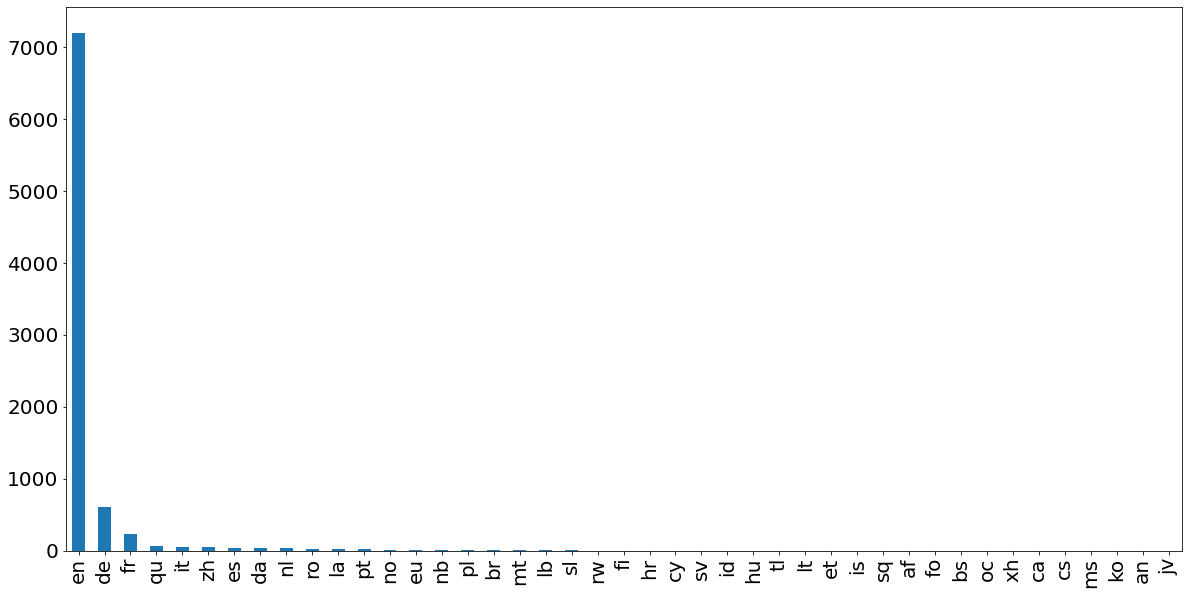

In [16]:
# convert our list of languages to a dataframe
langs_df = pd.DataFrame(langs)

# count the number of times we see each language
langs_count = langs_df.Description.value_counts()

# horrible-looking barplot (I would suggest using R for visualization)
langs_count.plot.bar(figsize=(20,10), fontsize=20)

In [17]:
print(langs_count)

en    7196
de     602
fr     240
qu      71
it      49
zh      47
es      37
da      37
nl      35
ro      25
la      25
pt      20
no      12
eu      11
nb      11
pl      10
br      10
mt       8
lb       7
sl       6
rw       4
fi       4
hr       3
cy       3
sv       3
id       2
hu       2
tl       2
lt       2
et       2
is       2
sq       1
af       1
fo       1
bs       1
oc       1
xh       1
ca       1
cs       1
ms       1
ko       1
an       1
jv       1
Name: Description, dtype: int64


In [18]:
tic_df['Assignment_group'] = tic_df.Assignment_group.astype("category").cat.codes

In [19]:
A_Grp = tic_df['Assignment_group'].unique()
Sorted_Grp = sorted(A_Grp)
print(Sorted_Grp)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73]


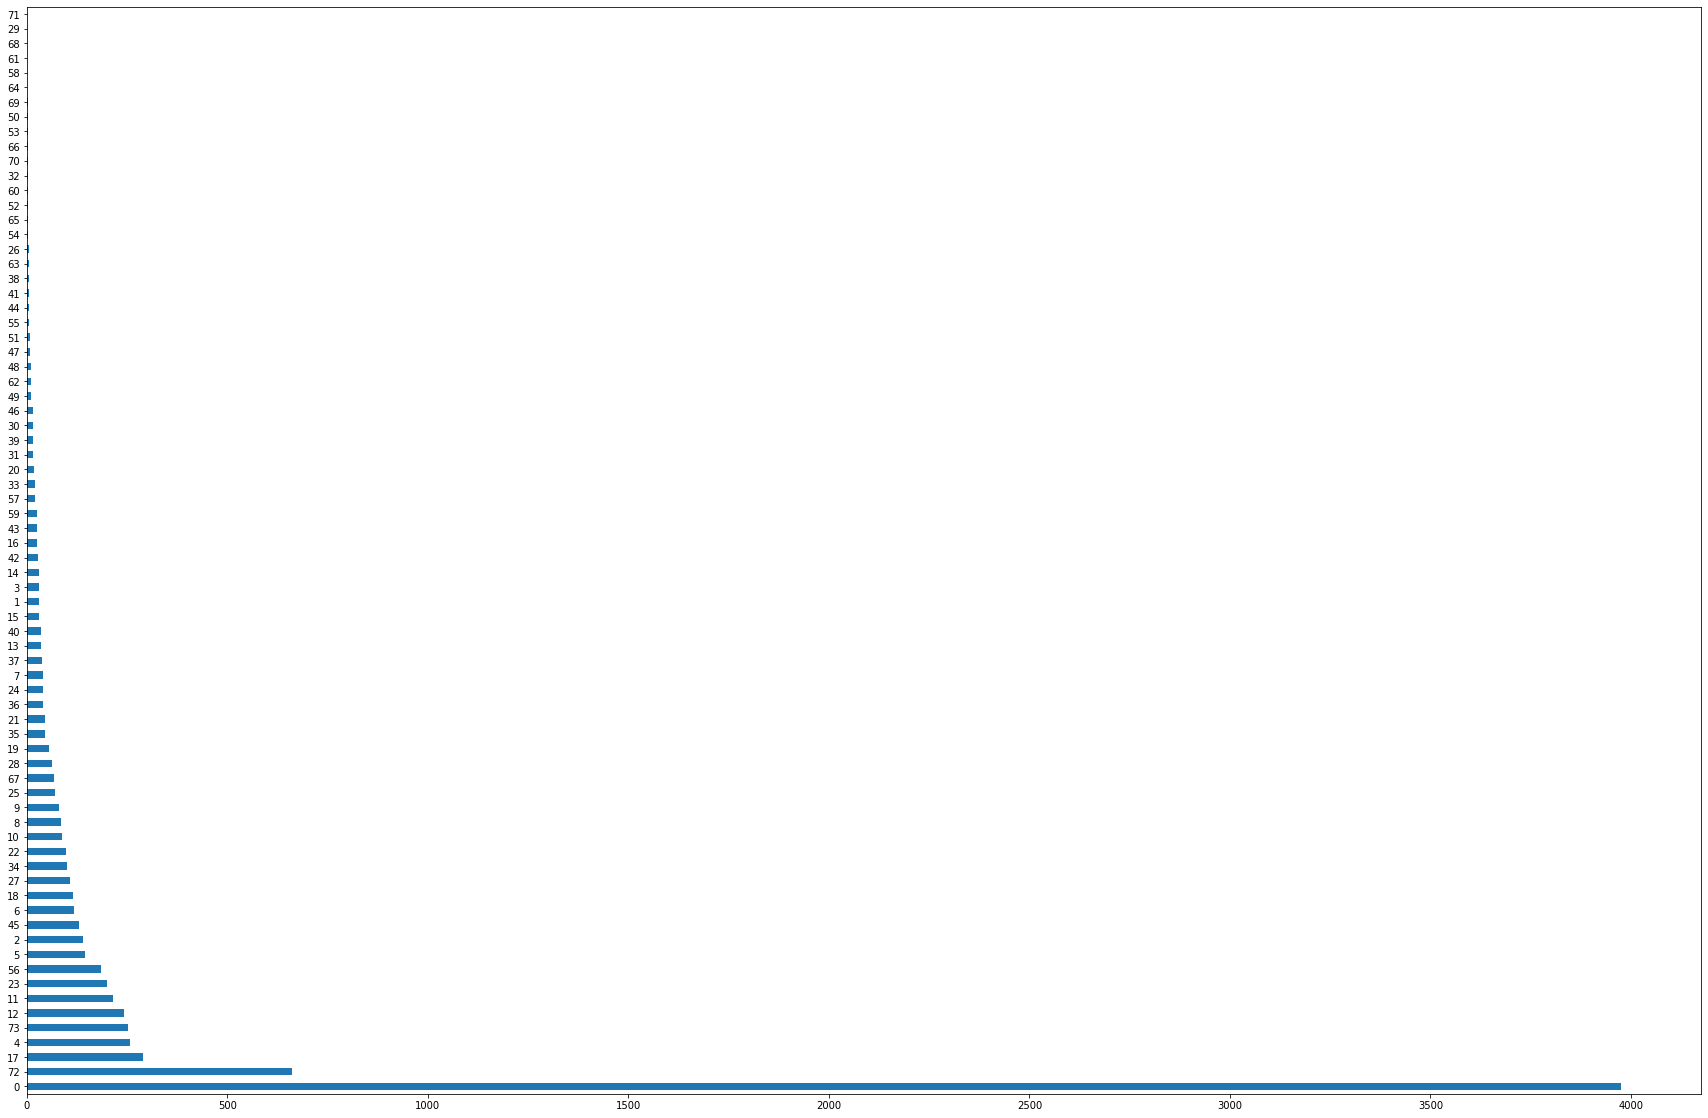

In [20]:
import matplotlib.pyplot as plt

tic_df['Assignment_group'].value_counts().plot(kind='barh', figsize=(30,20))

/usr/local/lib/python3.6/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


FrequencyVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fd5e0bafac8>,
                    color=None,
                    features=['00', '000', '0000', '000000', '000000220624227',
                              '000000221254416', '000000223172498',
                              '000000223670658', '000001', '00000etc', '00001',
                              '000010', '00002', '000020', '000030', '000040',
                              '000050', '000060', '000070', '000080', '000090',
                              '0000a0', '0000b0', '0000c0', '0000d0', '0000e0',
                              '0000f0', '0001', '00010', '000100', ...],
                    n=None, orient='v')

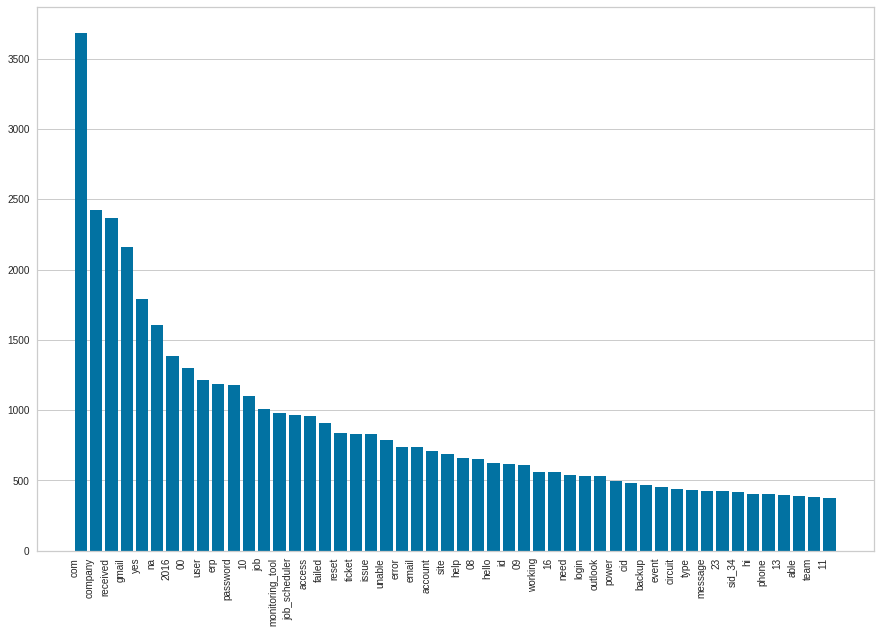

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

from yellowbrick.text import FreqDistVisualizer

from gensim import corpora

text_data = tic_df['Description'].tolist()

vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(text_data)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='v', size=(1080, 720))
visualizer.fit(docs)

In [22]:
tic_df['clean_desc'] = tic_df['Short_description'] + tic_df['Description']

In [23]:
from nltk.tokenize import word_tokenize 
text = "windowshighereducationnonameuseridmanager"
utils.split(text)

'  higher   education    name   use   rid   manager '

In [24]:
utils.spl("windowshighereducationnonameuseridmanager")

' windows   higher   education    name   use   rid   manager '

In [25]:
utils.preprocess(" user id rajaram/ chinnayan hi Salut, comment allez-vous, regardez le problème du serveur  Salut, comment allez-vous, regardez le problème du serveur Windows afternoon n't rajaram.chinnayan@gmail.com 20/12/2020 04:30:00 /exurcwkmsubject nonameuseridmanager")

'user rajaram chinnayan how be - look the server problem window not exurcwkm useridmanager'

In [26]:
#import time

#start = time.time()

#tic_df['clean_desc']  = tic_df['clean_desc'].apply(utils.preprocess)

#print("Total time for preprocessing: ", (time.time() - start)/60)

In [27]:
#tic_df.to_csv('preprocessed.csv')

In [28]:
tic_df.empty
tic_df=pd.read_csv('preprocessed.csv')

In [29]:
#to remove first name and last name from description

fname = [] 
lname = []

tic_df[['fname','lname']] = tic_df.Caller.str.split(expand=True) 

In [30]:
def name(text,name):
  repl = text.replace(name,'')
  return repl

tic_df['clean_desc'] = name(tic_df['clean_desc'],tic_df['fname']) 
tic_df['clean_desc'] = name(tic_df['clean_desc'],tic_df['lname']) 

In [31]:
tic_df.isna().sum()

Unnamed: 0           0
Short_description    0
Description          0
Caller               0
Assignment_group     0
clean_desc           1
fname                0
lname                0
dtype: int64

In [32]:
tic_df.loc[tic_df['clean_desc'].isna()]

,Unnamed: 0,Short_description,Description,Caller,Assignment_group,clean_desc,fname,lname
1860,1860,s,s,gzjtweph mnslwfqv,0,NaN,gzjtweph,mnslwfqv


In [33]:
tic_df.dropna(inplace=True)

In [34]:
def aaa(text,aaa):
  sent = []
  a = text.split()
  for b,c in enumerate(a):
    if c.find(aaa) == -1:
      sent.append(a[b])
    else:
      pass  
  return ' '.join([text for text in sent])     

In [35]:
clean_desc=[]
for i,j in enumerate(tic_df['clean_desc']):
  clean_desc.append(aaa(j,'zzz'))

In [36]:
tic_df['clean_desc'] = clean_desc

In [37]:
import nltk
from nltk.corpus import words
nltk.download('words')

def meanaa(text,aa):
  sent = []
  a = text.split()
  for b,c in enumerate(a):
    if c.find(aa) == -1 or c in words.words() != bool("True"):
      sent.append(a[b])
    else:
      pass  
  return ' '.join([text for text in sent])     

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [38]:
text = 'hi aahing aaliis aarrgh baaing baalim baases bazaar aac aaca aacecc aacoaz aacount aacsi aaeei aai aao aaoa aaocsa aaocse aaoeee aaoo aaoskypea aarr aas aasa aavpn aayai aaymann aaz aazea aazi abandon abap abb abba abc abca'
clean_desc1=[]
for i,j in enumerate(tic_df['clean_desc']):
  clean_desc1.append(meanaa(j,'aa'))

In [39]:
tic_df['clean_desc'] = clean_desc1

FrequencyVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f6c975080>,
                    color=None,
                    features=['abandon', 'abap', 'abb', 'abba', 'abc', 'abca',
                              'abcpassword', 'abd', 'abdhtyu', 'abend',
                              'abende', 'abended', 'abgebildet', 'abgrtyreu',
                              'abhay', 'abholen', 'ability', 'abl', 'able',
                              'abode', 'abort', 'aborting', 'abovementioned',
                              'abreu', 'abrurto', 'absence', 'absolutely',
                              'abstech', 'abstechprogramdntym', 'abwfnzw', ...],
                    n=None, orient='v')

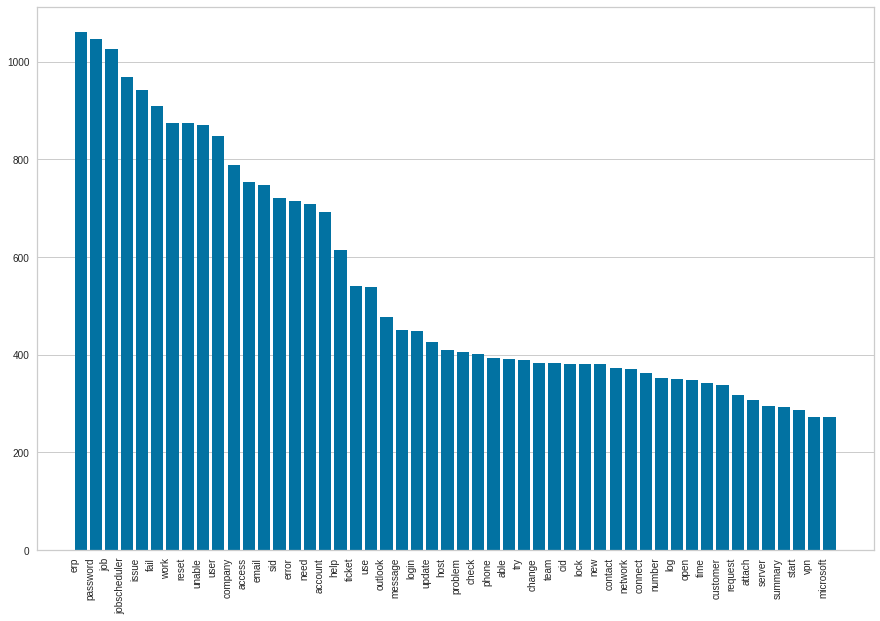

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

from yellowbrick.text import FreqDistVisualizer

from gensim import corpora

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

text_data = tic_df['clean_desc'].tolist()

vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(text_data)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='v', size=(1080, 720))
visualizer.fit(docs)

In [61]:
#from gensim.models import FastText

#model = FastText(sentences=docs, size=128)

#word = 'abovementioned' # can be out of vocabulary
#embedding = model[word] # fetches the word embedding
#print(embedding)

In [62]:
tic_df.tail(40)

,Unnamed: 0,Short_description,Description,Caller,Assignment_group,clean_desc,fname,lname
8460,8460,abended job in job_scheduler: Job_1148,received from: monitoring_tool@company.com\n\n...,ZkBogxib QsEJzdZO,73,abended job jobscheduler abende,ZkBogxib,QsEJzdZO
8461,8461,reboot lhqsm286 (patent web uacyltoe hxgaycze ...,reboot lhqsm286 (patent web uacyltoe hxgaycze ...,uvrbhlnt bjrmalzi,72,reboot lhqsm patent web uacyltoe hxgaycze server,uvrbhlnt,bjrmalzi
8462,8462,abended job in job_scheduler: Job_1141,received from: monitoring_tool@company.com\n\n...,ZkBogxib QsEJzdZO,73,abended job jobscheduler abende,ZkBogxib,QsEJzdZO
8463,8463,kindly refer mail-renew account for visfgthal-...,"hello snhdfihytu,\nkindly refer mail-renew acc...",rmdtqfxa fwpnqdxo,12,kindly refer mail renew account for visfgthal ...,rmdtqfxa,fwpnqdxo
8464,8464,SID_1 log in issue,\n\nreceived from: rjanhbde.owfkyjcp@gmail.com...,rjanhbde owfkyjcp,0,sid log issue could uacyltoe hxgaycze system c...,rjanhbde,owfkyjcp
8465,8465,vpn è¿žæŽ¥ä¸ä¸Š,vpnè¿žä¸ä¸Šï¼Œè¯·è½¬ç»™ è´ºæ­£å¹³ atcbvglq.bd...,fcvqezmn frzyjknu,24,vpn ezza svpneza ctm,fcvqezmn,frzyjknu
8466,8466,abended job in job_scheduler: bkwin_HostName_7...,received from: monitoring_tool@company.com\n\n...,ZkBogxib QsEJzdZO,72,abended job jobscheduler bkwinhost inc abende,ZkBogxib,QsEJzdZO
8467,8467,"hi it help team, please unblock my new compan...","from: ntydihzo aeptfbgs \nsent: friday, august...",ntydihzo aeptfbgs,0,help team please unblock new company device nt...,ntydihzo,aeptfbgs
8468,8468,can you unblock my account so i can use outlo...,"from: nwfodmhc exurcwkm \nsent: friday, august...",eqzibjhw ymebpoih,0,can - unblock account use outlook app nwfodmhc...,eqzibjhw,ymebpoih
8469,8469,plant_101 value added services - one day pick ...,request to phase in additional vas customers. ...,xnqzhtwu hivumtfz,10,plant value add service one day pick route pro...,xnqzhtwu,hivumtfz


In [63]:
docs = tic_df['clean_desc']

In [64]:
docs=docs.tolist()

In [65]:
from sklearn.feature_extraction.text import CountVectorizer

#create a vocabulary of words, 
#ignore words that appear in 85% of documents, 
#eliminate stop words
cv=CountVectorizer(ngram_range = (1, 2),stop_words=STOP_WORDS,max_features=10000)
word_count_vector=cv.fit_transform(docs)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [66]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [67]:
# tf-idf scores
tf_idf_vector=tfidf_transformer.transform(word_count_vector)

In [68]:
feature_names = cv.get_feature_names()

#get tfidf vector for first document
first_document_vector=tf_idf_vector[20]

#print the scores
df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

,tfidf
payslipsunable payslip,0.490458
payslipsunable,0.490458
unable check,0.477823
payslip,0.451209
check,0.229268
...,...
fine transaction,0.000000
fine try,0.000000
fine user,0.000000
finish,0.000000


In [69]:
from gensim import corpora

text_data = tic_df['clean_desc'].apply(word_tokenize)

dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]

import pickle 
pickle.dump(corpus, open('corpus.pkl','wb'))
dictionary.save('dictionary.gensim')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [70]:
from gensim.models import ldamodel

result = ldamodel.LdaModel(corpus,id2word=dictionary,num_topics = 74)
print(result.show_topics())

for idx,topic in result.print_topics(-1):
  print('Topic: {} \nWords: {}'.format(idx,topic))

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

[(11, '0.048*"not" + 0.040*"error" + 0.033*"the" + 0.031*"can" + 0.027*"see" + 0.026*"please" + 0.026*"attach" + 0.024*"message" + 0.020*"create" + 0.018*"work"'), (24, '0.037*"slow" + 0.031*"installation" + 0.027*"operation" + 0.024*"net" + 0.023*"department" + 0.021*"supervisor" + 0.021*"keybankrd" + 0.020*"various" + 0.020*"transfer" + 0.019*"service"'), (29, '0.032*"ticketingtool" + 0.030*"other" + 0.028*"erp" + 0.028*"work" + 0.027*"not" + 0.027*"have" + 0.027*"condition" + 0.027*"be" + 0.026*"code" + 0.026*"same"'), (65, '0.038*"log" + 0.032*"screen" + 0.030*"not" + 0.029*"into" + 0.028*"the" + 0.023*"get" + 0.020*"vpn" + 0.019*"can" + 0.018*"access" + 0.013*"please"'), (49, '0.087*"down" + 0.071*"usa" + 0.069*"since" + 0.063*"company" + 0.037*"host" + 0.031*"com" + 0.031*"lhqsm" + 0.024*"access" + 0.023*"interface" + 0.021*"robot"'), (32, '0.059*"drive" + 0.034*"per" + 0.033*"access" + 0.022*"aerp" + 0.021*"computer" + 0.021*"network" + 0.020*"database" + 0.018*"please" + 0.018*

In [71]:
lda_display = pyLDAvis.gensim.prepare(result,corpus,dictionary,sort_topics=True)
pyLDAvis.display(lda_display)

In [72]:
from gensim.models.phrases import Phrases, Phraser

tokenize = word_tokenize
docs = tic_df['clean_desc']
docs = [tokenize(doc) for doc in docs]
phrases = Phrases(docs)
bigrams = Phraser(phrases)
trigrams = Phrases(bigrams[docs])

In [73]:
for idx in range(len(docs)):
    for token in bigrams[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)
    for token in trigrams[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [74]:
from gensim.corpora import Dictionary

corpus1 = [[w for w in bigrams[doc]] for doc in docs]
dictionary = corpora.Dictionary(corpus1)
# Create a dictionary representation of the documents.
#dictionary = Dictionary(docs)
print('Number of unique words in initital documents:', len(dictionary))

# Filter out words that occur less than 10 documents, or more than 20% of the documents.
dictionary.filter_extremes(no_below=10, no_above=0.2)
print('Number of unique words after removing rare and common words:', len(dictionary))


Number of unique words in initital documents: 14668
Number of unique words after removing rare and common words: 1822


In [75]:
corpus1 = [dictionary.doc2bow(doc) for doc in docs]

In [76]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 1822
Number of documents: 8499


In [77]:
import pickle 
pickle.dump(corpus, open('corpus1.pkl','wb'))
dictionary.save('dictionary1.gensim')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [78]:
from gensim.models import LdaModel
# Set training parameters.
num_topics = 74

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

%time model = LdaModel(corpus=corpus1, id2word=id2word, num_topics = 74)
print(model.show_topics())

for idx,topic in model.print_topics(-1):
  print('Topic: {} \nWords: {}'.format(idx,topic))

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

CPU times: user 6.23 s, sys: 1.86 s, total: 8.1 s
Wall time: 6 s
[(61, '0.113*"tiyhum_kuyiomar" + 0.096*"distributortool" + 0.078*"about" + 0.078*"installation" + 0.044*"password" + 0.039*"card" + 0.033*"forget" + 0.031*"transfer" + 0.027*"moment" + 0.027*"must"'), (42, '0.046*"issue" + 0.045*"printer" + 0.044*"see_below" + 0.040*"inquiry" + 0.032*"even_though" + 0.031*"operator" + 0.030*"ethic" + 0.028*"network" + 0.027*"office" + 0.026*"even"'), (0, '0.079*"see_attach" + 0.041*"attach" + 0.035*"see" + 0.026*"via" + 0.025*"wrong" + 0.022*"recently" + 0.021*"deny" + 0.021*"and" + 0.021*"technical_detail" + 0.019*"include"'), (6, '0.094*"bit" + 0.054*"september" + 0.047*"end" + 0.033*"backup_circuit" + 0.026*"download" + 0.026*"inbound" + 0.025*"work_fine" + 0.024*"once" + 0.023*"month" + 0.020*"schedule"'), (60, '0.075*"setup_new" + 0.044*"august_nwfodmhc" + 0.037*"setup" + 0.036*"new" + 0.034*"dear_sir" + 0.025*"ess_portal" + 0.019*"notification" + 0.019*"company" + 0.018*"mailto" + 0

In [79]:
lda_display = pyLDAvis.gensim.prepare(model,corpus1,dictionary,sort_topics=True)
pyLDAvis.display(lda_display)

In [80]:
sentences = tic_df['clean_desc'].tolist()

In [81]:
vectorizer = CountVectorizer(stop_words=STOP_WORDS,max_features=10000)
vectorizer.fit(sentences)
vectorizer.vocabulary_

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


{'login': 4404,
 'issue': 4069,
 'verify': 8774,
 'user': 8638,
 'detail': 2094,
 'employee': 2838,
 'manager': 4487,
 'check': 1293,
 'reset': 6413,
 'password': 5089,
 'advise': 209,
 'caller': 1201,
 'confirm': 1428,
 'able': 18,
 'resolve': 6439,
 'outlook': 4928,
 'team': 7871,
 'meeting': 4557,
 'skype': 7229,
 'etc': 3111,
 'appear': 542,
 'calendar': 1196,
 'somebody': 7343,
 'correct': 1554,
 'kind': 4219,
 'log': 4401,
 'vpn': 8916,
 'best': 1059,
 'unable': 8418,
 'access': 45,
 'hrtool': 3856,
 'pageunable': 5022,
 'page': 5018,
 'error': 3027,
 'engineering': 2880,
 'tool': 8151,
 'skypeunable': 7238,
 'event': 3180,
 'critical': 1650,
 'host': 3836,
 'company': 1386,
 'com': 1369,
 'value': 8720,
 'threshold': 8019,
 'oracle': 4889,
 'sid': 7154,
 'erpdata': 2986,
 'psa': 5805,
 'datum': 1907,
 'perpsr': 5217,
 'ticketno': 8054,
 'employment': 2843,
 'status': 7519,
 'new': 4741,
 'non': 4782,
 'enter': 2912,
 'disable': 2226,
 'add': 163,
 'outlookunable': 4951,
 'ticket

In [82]:
X = vectorizer.transform(sentences).toarray()

In [83]:
y = tic_df['Assignment_group'].values

In [84]:
'''Classifiers'''
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import model

In [85]:
model_dict = {'Logistic Regression' : LogisticRegression(max_iter=1000),
              'Stochastic Gradient Descent' : SGDClassifier(random_state=3, loss='log'),
              'Random Forest': RandomForestClassifier(random_state=3),
              'Decsision Tree': DecisionTreeClassifier(random_state=3),
              'Support Vector Machines': LinearSVC(max_iter=10000),
              'AdaBoost': AdaBoostClassifier(random_state=3),
              'Gaussian Naive Bayes': GaussianNB(),
              'K Nearest Neighbor': KNeighborsClassifier()
              }

model.score_matrix(model_dict,X,y)

Total Time for Logistic Regression is  3.368218410015106
Total Time for Stochastic Gradient Descent is  2.0124019463857015
Total Time for Random Forest is  0.526619839668274
Total Time for Decsision Tree is  0.22092820008595784
Total Time for Support Vector Machines is  0.0670738418896993
Total Time for AdaBoost is  1.014909573396047
Total Time for Gaussian Naive Bayes is  0.15045634508132935
Total Time for K Nearest Neighbor is  3.0586489756902058


,model_name,accuracy_score,precision_score,recall_score,f1_score
4,Support Vector Machines,66.4706,0.58134,0.339353,0.343172
1,Stochastic Gradient Descent,67.7059,0.741722,0.25077,0.287501
0,Logistic Regression,67.5294,0.732291,0.248079,0.278435
3,Decsision Tree,60.1765,0.403537,0.2544,0.237671
2,Random Forest,64.3529,0.801696,0.195922,0.229369
6,Gaussian Naive Bayes,38.6471,0.283432,0.268008,0.173472
7,K Nearest Neighbor,58.4706,0.846072,0.120591,0.136836
5,AdaBoost,52.0588,0.966989,0.0590946,0.0356471


## Apply Keras Tokenizer of headline column of your data.  
Hint - First create a tokenizer instance using Tokenizer(num_words=max_features) 
And then fit this tokenizer instance on your data column tic_df['clean_desc'] using .fit_on_texts()

In [86]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline

In [87]:
import tensorflow as tf
from keras.models import *
from keras.layers import *
from keras.callbacks import *
from keras.preprocessing import sequence, text
from keras.preprocessing.text import Tokenizer
from tensorflow import keras
from keras.preprocessing.sequence import pad_sequences
from keras.optimizers import RMSprop,Adam

In [43]:
#We will check the maximum number of words that can be present in a description , this will help us in padding later

max_len = tic_df['clean_desc'].apply(lambda x:len(str(x).split())).max()

print('The maximum length of words in the headline is',max_len)

The maximum length of words in the headline is 449


In [44]:
X = tic_df['clean_desc']
y = tf.keras.utils.to_categorical( tic_df['Assignment_group'])

In [45]:
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y,
                                                  random_state=42, 
                                                  test_size=0.2, shuffle=True)

In [46]:
xtrain.shape,xvalid.shape

((6799,), (1700,))

In [47]:
ytrain.shape,yvalid.shape

((6799, 74), (1700, 74))

In [48]:
max_len = 449
embed_size = 300


# using keras tokenizer here
token = text.Tokenizer(num_words=None)


token.fit_on_texts(list(xtrain) + list(xvalid))
xtrain_seq = token.texts_to_sequences(xtrain)
xvalid_seq = token.texts_to_sequences(xvalid)

#zero pad the sequences
xtrain_pad = sequence.pad_sequences(xtrain_seq, maxlen=max_len)
xvalid_pad = sequence.pad_sequences(xvalid_seq, maxlen=max_len)

word_index = token.word_index

num_words = len(word_index) + 1

In [88]:
METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.CategoricalAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
]


In [89]:
RNN = model.RNN(METRICS,num_words,embed_size,max_len)
RNN.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 449, 300)          4011300   
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 100)               40100     
_________________________________________________________________
dense_7 (Dense)              (None, 74)                7474      
Total params: 4,058,874
Trainable params: 4,058,874
Non-trainable params: 0
_________________________________________________________________


# Fit your model with a batch size of 100 and validation_split = 0.2. and state the validation accuracy


In [90]:
RNN.fit(xtrain_pad,ytrain,batch_size=100,epochs=20)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/20
6799/6799 [==============================] - 35s 5ms/step - loss: 3.3395 - tp: 2511.0000 - fp: 59179.1758 - tn: 192669.7500 - fn: 938.9853 - accuracy: 0.3781 - precision: 0.0369 - recall: 0.7330 - auc: 0.8028
Epoch 2/20
6799/6799 [==============================] - 35s 5ms/step - loss: 2.5107 - tp: 6265.9561 - fp: 80645.6328 - tn: 667530.2500 - fn: 3983.0293 - accuracy: 0.4486 - precision: 0.0719 - recall: 0.6169 - auc: 0.8377
Epoch 3/20
6799/6799 [==============================] - 35s 5ms/step - loss: 2.2867 - tp: 9698.9854 - fp: 84543.3516 - tn: 1159959.5000 - fn: 7349.0000 - accuracy: 0.4580 - precision: 0.1027 - recall: 0.5694 - auc: 0.8534
Epoch 4/20
6799/6799 [==============================] - 34s 5ms/step - loss: 2.0631 - tp: 13467.0000 - fp: 89351.0859 - tn: 1651479.0000 - fn: 10379.9854 - accuracy: 0.4647 - precision: 0.1308 - recall: 0.5646 - auc: 0.8728
Epoch 5/20
6799/6799 [==============================] - 34s 5ms/step - loss: 1.7259 - tp: 17447.4551 - fp: 93582.

In [91]:
loss, tp,fp,tn,fn,accuracy,precision,recall,auc  = RNN.evaluate(xvalid_pad,yvalid,verbose=0)
scores_model = []
scores_model.append({'Model': 'SimpleRNN','AUC_Score': auc*100,'Accuracy': accuracy*100,'Recall': recall*100,'Precision': precision*100,'F1_Score':(2 * (precision * recall) / (precision + recall)
)*100})
print(scores_model)

[{'Model': 'SimpleRNN', 'AUC_Score': 96.75333499908447, 'Accuracy': 76.72247886657715, 'Recall': 46.72625958919525, 'Precision': 39.01766538619995, 'F1_Score': 42.5254514981231}]


In [104]:
METRICS = [
      tf.keras.metrics.TruePositives(name='tp1'),
      tf.keras.metrics.FalsePositives(name='fp1'),
      tf.keras.metrics.TrueNegatives(name='tn1'),
      tf.keras.metrics.FalseNegatives(name='fn1'), 
      tf.keras.metrics.CategoricalAccuracy(name='accuracy1'),
      tf.keras.metrics.Precision(name='precision1'),
      tf.keras.metrics.Recall(name='recall1'),
      tf.keras.metrics.AUC(name='auc1'),
]


In [93]:
SILSTM = model.SILSTM(METRICS,num_words,embed_size,max_len)
SILSTM.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 449, 300)          4011300   
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               12928     
_________________________________________________________________
dense_9 (Dense)              (None, 74)                9546      
Total params: 4,194,174
Trainable params: 4,194,174
Non-trainable params: 0
_________________________________________________________________


In [94]:
SILSTM.fit(xtrain_pad,ytrain,batch_size=100,epochs=20)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/20
6799/6799 [==============================] - 114s 17ms/step - loss: 3.2798 - tp1: 2482.6323 - fp1: 62796.2188 - tn1: 189052.7031 - fn1: 967.3530 - accuracy1: 0.4104 - precision1: 0.0345 - recall1: 0.7193 - auc1: 0.7869
Epoch 2/20
6799/6799 [==============================] - 113s 17ms/step - loss: 2.4703 - tp1: 6233.9561 - fp1: 84031.7500 - tn1: 664144.0625 - fn1: 4015.0293 - accuracy1: 0.4564 - precision1: 0.0689 - recall1: 0.6131 - auc1: 0.8391
Epoch 3/20
6799/6799 [==============================] - 112s 17ms/step - loss: 2.1534 - tp1: 9827.8525 - fp1: 88375.7188 - tn1: 1156127.1250 - fn1: 7220.1323 - accuracy1: 0.4624 - precision1: 0.0999 - recall1: 0.5768 - auc1: 0.8660
Epoch 4/20
6799/6799 [==============================] - 113s 17ms/step - loss: 1.9446 - tp1: 13752.3525 - fp1: 93997.6875 - tn1: 1646832.3750 - fn1: 10094.6328 - accuracy1: 0.4637 - precision1: 0.1274 - recall1: 0.5766 - auc1: 0.8866
Epoch 5/20
6799/6799 [==============================] - 114s 17ms/step - 

In [95]:
loss, tp1,fp1,tn1,fn1,accuracy1,precision1,recall1,auc1  = SILSTM.evaluate(xvalid_pad,yvalid,verbose=0)
print('Accuracy: %f' % (accuracy1*100))
print('Area under the curve: %f' % (auc1*100))

scores_model.append({'Model': 'Simple LSTM','AUC_Score': auc1*100,'Accuracy': accuracy1*100,'Recall': recall1*100,'Precision': precision1*100,'F1_Score':(2 * (precision1 * recall1) / (precision1 + recall1)
)*100})
print(scores_model)

Accuracy: 71.838540
Area under the curve: 90.550590
[{'Model': 'SimpleRNN', 'AUC_Score': 96.75333499908447, 'Accuracy': 76.72247886657715, 'Recall': 46.72625958919525, 'Precision': 39.01766538619995, 'F1_Score': 42.5254514981231}, {'Model': 'Simple LSTM', 'AUC_Score': 90.5505895614624, 'Accuracy': 71.8385398387909, 'Recall': 18.908949196338654, 'Precision': 19.075091183185577, 'F1_Score': 18.991656837686907}]


# Get the Word Embeddings using Embedding file as given below.

In [96]:
# load the GloVe vectors in a dictionary:

embeddings_index = {}
f = open('glove.6B.300d.txt','r',encoding='utf-8')
for line in tqdm(f):
    values = line.split(' ')
    word = values[0]
    coefs = np.asarray([float(val) for val in values[1:]])
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

400000it [00:44, 9078.50it/s]

Found 400000 word vectors.


# Create a weight matrix for words in training docs

In [97]:
# create an embedding matrix for the words we have in the dataset
embedding_matrix = np.zeros((len(word_index) + 1, 300))
for word, i in tqdm(word_index.items()):
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

100%|██████████| 13370/13370 [00:00<00:00, 559932.95it/s]


In [103]:
METRICS = [
      tf.keras.metrics.TruePositives(name='tp2'),
      tf.keras.metrics.FalsePositives(name='fp2'),
      tf.keras.metrics.TrueNegatives(name='tn2'),
      tf.keras.metrics.FalseNegatives(name='fn2'), 
      tf.keras.metrics.CategoricalAccuracy(name='accuracy2'),
      tf.keras.metrics.Precision(name='precision2'),
      tf.keras.metrics.Recall(name='recall2'),
      tf.keras.metrics.AUC(name='auc2'),
]


In [105]:
GLVSTM = model.GLVSTM(METRICS,num_words,embed_size,embedding_matrix,max_len)
GLVSTM.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 449, 300)          4011300   
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 449, 300)          0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_14 (Dense)             (None, 128)               12928     
_________________________________________________________________
dense_15 (Dense)             (None, 74)                9546      
Total params: 4,194,174
Trainable params: 182,874
Non-trainable params: 4,011,300
_________________________________________________________________


In [106]:
GLVSTM.fit(xtrain_pad,ytrain,batch_size=100,epochs=20)

Epoch 1/20
6799/6799 [==============================] - 104s 15ms/step - loss: 3.2655 - tp1: 2392.4558 - fp1: 51702.1914 - tn1: 200146.7344 - fn1: 1057.5294 - accuracy1: 0.3544 - precision1: 0.0398 - recall1: 0.6880 - auc1: 0.7864
Epoch 2/20
6799/6799 [==============================] - 103s 15ms/step - loss: 2.5080 - tp1: 6108.4854 - fp1: 69876.0625 - tn1: 678299.9375 - fn1: 4140.5000 - accuracy1: 0.4476 - precision1: 0.0801 - recall1: 0.6011 - auc1: 0.8413
Epoch 3/20
6799/6799 [==============================] - 102s 15ms/step - loss: 2.2872 - tp1: 9482.0732 - fp1: 73729.1797 - tn1: 1170773.6250 - fn1: 7565.9116 - accuracy1: 0.4550 - precision1: 0.1137 - recall1: 0.5566 - auc1: 0.8620
Epoch 4/20
6799/6799 [==============================] - 103s 15ms/step - loss: 2.1255 - tp1: 13177.9854 - fp1: 78206.8984 - tn1: 1662622.8750 - fn1: 10669.0000 - accuracy1: 0.4591 - precision1: 0.1440 - recall1: 0.5526 - auc1: 0.8801
Epoch 5/20
6799/6799 [==============================] - 103s 15ms/step -

In [107]:
loss, tp2,fp2,tn2,fn2,accuracy2,precision2,recall2,auc2  = GLVSTM.evaluate(xvalid_pad,yvalid,verbose=0)
print('Accuracy: %f' % (accuracy2*100))
print('Area under the curve: %f' % (auc2*100))

scores_model.append({'Model': 'GLOVE LSTM','AUC_Score': auc2*100,'Accuracy': accuracy2*100,'Recall': recall2*100,'Precision': precision2*100,'F1_Score':(2 * (precision2 * recall2) / (precision2 + recall2)
)*100})
print(scores_model)

Accuracy: 56.950706
Area under the curve: 91.716814
[{'Model': 'SimpleRNN', 'AUC_Score': 96.75333499908447, 'Accuracy': 76.72247886657715, 'Recall': 46.72625958919525, 'Precision': 39.01766538619995, 'F1_Score': 42.5254514981231}, {'Model': 'Simple LSTM', 'AUC_Score': 90.5505895614624, 'Accuracy': 71.8385398387909, 'Recall': 18.908949196338654, 'Precision': 19.075091183185577, 'F1_Score': 18.991656837686907}, {'Model': 'GLOVE LSTM', 'AUC_Score': 91.7168140411377, 'Accuracy': 56.950706243515015, 'Recall': 31.766608357429504, 'Precision': 28.05902063846588, 'F1_Score': 29.79792889687233}]


In [52]:
METRICS = [
      tf.keras.metrics.TruePositives(name='tp3'),
      tf.keras.metrics.FalsePositives(name='fp3'),
      tf.keras.metrics.TrueNegatives(name='tn3'),
      tf.keras.metrics.FalseNegatives(name='fn3'), 
      tf.keras.metrics.CategoricalAccuracy(name='accuracy3'),
      tf.keras.metrics.Precision(name='precision3'),
      tf.keras.metrics.Recall(name='recall3'),
      tf.keras.metrics.AUC(name='auc3'),
]


In [53]:
BILSTM = model.BILSTM(METRICS,num_words,embed_size,max_len)
BILSTM.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 449, 300)          4011300   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 200)               320800    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               25728     
_________________________________________________________________
dense_4 (Dense)              (None, 74)                9546      
Total params: 4,367,374
Trainable params: 4,367,374
Non-trainable params: 0
_________________________________________________________________


In [54]:
BILSTM.fit(xtrain_pad,ytrain,batch_size=100,epochs=20)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/20
6799/6799 [==============================] - 233s 34ms/step - loss: 3.1685 - tp3: 2334.2646 - fp3: 42277.4570 - tn3: 209571.4688 - fn3: 1115.7206 - accuracy3: 0.4282 - precision3: 0.0475 - recall3: 0.6891 - auc3: 0.8119
Epoch 2/20
6799/6799 [==============================] - 230s 34ms/step - loss: 2.4666 - tp3: 6146.1470 - fp3: 59158.6914 - tn3: 689017.1875 - fn3: 4102.8384 - accuracy3: 0.4623 - precision3: 0.0936 - recall3: 0.6030 - auc3: 0.8581
Epoch 3/20
6799/6799 [==============================] - 229s 34ms/step - loss: 2.0093 - tp3: 9771.8525 - fp3: 64152.6172 - tn3: 1180350.5000 - fn3: 7276.1323 - accuracy3: 0.4631 - precision3: 0.1318 - recall3: 0.5731 - auc3: 0.8823
Epoch 4/20
6799/6799 [==============================] - 228s 34ms/step - loss: 1.7607 - tp3: 13992.3828 - fp3: 70366.8984 - tn3: 1670463.0000 - fn3: 9854.6025 - accuracy3: 0.4648 - precision3: 0.1655 - recall3: 0.5863 - auc3: 0.9025
Epoch 5/20
6799/6799 [==============================] - 223s 33ms/step - 

In [108]:
loss, tp3,fp3,tn3,fn3,accuracy3,precision3,recall3,auc3  = BILSTM.evaluate(xvalid_pad,yvalid,verbose=0)
print('Accuracy: %f' % (accuracy3*100))
print('Area under the curve: %f' % (auc3*100))

scores_model.append({'Model': 'Bi LSTM','AUC_Score': auc3*100,'Accuracy': accuracy3*100,'Recall': recall3*100,'Precision': precision3*100,'F1_Score':(2 * (precision3 * recall3) / (precision3 + recall3)
)*100})
print(scores_model)

Accuracy: 73.746192
Area under the curve: 91.401750
[{'Model': 'SimpleRNN', 'AUC_Score': 96.75333499908447, 'Accuracy': 76.72247886657715, 'Recall': 46.72625958919525, 'Precision': 39.01766538619995, 'F1_Score': 42.5254514981231}, {'Model': 'Simple LSTM', 'AUC_Score': 90.5505895614624, 'Accuracy': 71.8385398387909, 'Recall': 18.908949196338654, 'Precision': 19.075091183185577, 'F1_Score': 18.991656837686907}, {'Model': 'GLOVE LSTM', 'AUC_Score': 91.7168140411377, 'Accuracy': 56.950706243515015, 'Recall': 31.766608357429504, 'Precision': 28.05902063846588, 'F1_Score': 29.79792889687233}, {'Model': 'Bi LSTM', 'AUC_Score': 91.40174984931946, 'Accuracy': 73.74619245529175, 'Recall': 23.898540437221527, 'Precision': 26.513683795928955, 'F1_Score': 25.138281596392652}]


In [55]:
METRICS = [
      tf.keras.metrics.TruePositives(name='tp4'),
      tf.keras.metrics.FalsePositives(name='fp4'),
      tf.keras.metrics.TrueNegatives(name='tn4'),
      tf.keras.metrics.FalseNegatives(name='fn4'), 
      tf.keras.metrics.CategoricalAccuracy(name='accuracy4'),
      tf.keras.metrics.Precision(name='precision4'),
      tf.keras.metrics.Recall(name='recall4'),
      tf.keras.metrics.AUC(name='auc4'),
]


In [56]:
GRUMOD = model.GRU_MOD(METRICS,num_words,embed_size,max_len)
GRUMOD.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 449, 300)          4011300   
_________________________________________________________________
gru_1 (GRU)                  (None, 100)               120300    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               12928     
_________________________________________________________________
dense_6 (Dense)              (None, 74)                9546      
Total params: 4,154,074
Trainable params: 4,154,074
Non-trainable params: 0
_________________________________________________________________


In [57]:
GRUMOD.fit(xtrain_pad,ytrain,batch_size=100,epochs=20)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/20
6799/6799 [==============================] - 124s 18ms/step - loss: 3.3450 - tp4: 2451.1030 - fp4: 52859.9258 - tn4: 198989.0000 - fn4: 998.8823 - accuracy4: 0.4120 - precision4: 0.0403 - recall4: 0.7217 - auc4: 0.7944
Epoch 2/20
6799/6799 [==============================] - 122s 18ms/step - loss: 2.2466 - tp4: 6226.1763 - fp4: 72042.9844 - tn4: 676132.9375 - fn4: 4022.8088 - accuracy4: 0.4565 - precision4: 0.0792 - recall4: 0.6102 - auc4: 0.8474
Epoch 3/20
6799/6799 [==============================] - 121s 18ms/step - loss: 1.8338 - tp4: 10302.0000 - fp4: 78820.9297 - tn4: 1165682.1250 - fn4: 6745.9854 - accuracy4: 0.4663 - precision4: 0.1152 - recall4: 0.6038 - auc4: 0.8817
Epoch 4/20
6799/6799 [==============================] - 123s 18ms/step - loss: 1.5046 - tp4: 14537.6172 - fp4: 85590.6875 - tn4: 1655239.2500 - fn4: 9309.3672 - accuracy4: 0.4886 - precision4: 0.1450 - recall4: 0.6099 - auc4: 0.9041
Epoch 5/20
6799/6799 [==============================] - 124s 18ms/step - 

In [109]:
loss, tp4,fp4,tn4,fn4,accuracy4,precision4,recall4,auc4  = GRUMOD.evaluate(xvalid_pad,yvalid,verbose=0)
print('Accuracy: %f' % (accuracy4*100))
print('Area under the curve: %f' % (auc4*100))

scores_model.append({'Model': ' GRU ','AUC_Score': auc4*100,'Accuracy': accuracy4*100,'Recall': recall4*100,'Precision': precision4*100,'F1_Score':(2 * (precision4 * recall4) / (precision4 + recall4)
)*100})
print(scores_model)

Accuracy: 78.866088
Area under the curve: 92.691267
[{'Model': 'SimpleRNN', 'AUC_Score': 96.75333499908447, 'Accuracy': 76.72247886657715, 'Recall': 46.72625958919525, 'Precision': 39.01766538619995, 'F1_Score': 42.5254514981231}, {'Model': 'Simple LSTM', 'AUC_Score': 90.5505895614624, 'Accuracy': 71.8385398387909, 'Recall': 18.908949196338654, 'Precision': 19.075091183185577, 'F1_Score': 18.991656837686907}, {'Model': 'GLOVE LSTM', 'AUC_Score': 91.7168140411377, 'Accuracy': 56.950706243515015, 'Recall': 31.766608357429504, 'Precision': 28.05902063846588, 'F1_Score': 29.79792889687233}, {'Model': 'Bi LSTM', 'AUC_Score': 91.40174984931946, 'Accuracy': 73.74619245529175, 'Recall': 23.898540437221527, 'Precision': 26.513683795928955, 'F1_Score': 25.138281596392652}, {'Model': ' GRU ', 'AUC_Score': 92.69126653671265, 'Accuracy': 78.86608839035034, 'Recall': 25.67180097103119, 'Precision': 25.901097059249878, 'F1_Score': 25.78593928330385}]


In [110]:
# Visualization of Results obtained from various Deep learning models
results = pd.DataFrame(scores_model).sort_values(by='AUC_Score',ascending=False)
results.style.background_gradient(cmap='Blues')

,Model,AUC_Score,Accuracy,Recall,Precision,F1_Score
0,SimpleRNN,96.753335,76.722479,46.726260,39.017665,42.525451
4,GRU,92.691267,78.866088,25.671801,25.901097,25.785939
2,GLOVE LSTM,91.716814,56.950706,31.766608,28.059021,29.797929
3,Bi LSTM,91.401750,73.746192,23.898540,26.513684,25.138282
1,Simple LSTM,90.550590,71.838540,18.908949,19.075091,18.991657


In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

/usr/local/lib/python3.6/dist-packages/plotly/express/_doc.py:503: DeprecationWarning:

inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()

/usr/local/lib/python3.6/dist-packages/plotly/express/_doc.py:503: DeprecationWarning:

inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()

/usr/local/lib/python3.6/dist-packages/plotly/express/_doc.py:503: DeprecationWarning:

inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()

/usr/local/lib/python3.6/dist-packages/plotly/express/_doc.py:503: DeprecationWarning:

inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()

/usr/local/lib/python3.6/dist-packages/plotly/express/_doc.py:503: DeprecationWarning:

inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()

/usr/local/lib/python3.6/dist-

In [112]:
fig = go.Figure(go.Funnelarea(
    text =results.Model,
    values = results.Recall,
    title = {"position": "top center", "text": "Funnel-Chart of Assignment group Distribution"}
    ))
fig.show()